In [1]:
import pandas as pd

In [6]:
df = pd.read_csv("data/online_retail.csv", encoding="latin1")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [8]:
# Remove rows with missing CustomerID
df.dropna(subset=['CustomerID'], inplace=True)

# Remove negative or zero quantity records
df = df[df['Quantity'] > 0]

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Convert InvoiceDate to datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Create TotalPrice column
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

print("Cleaned Dataset Shape:", df.shape)
df.head()

Cleaned Dataset Shape: (392732, 9)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


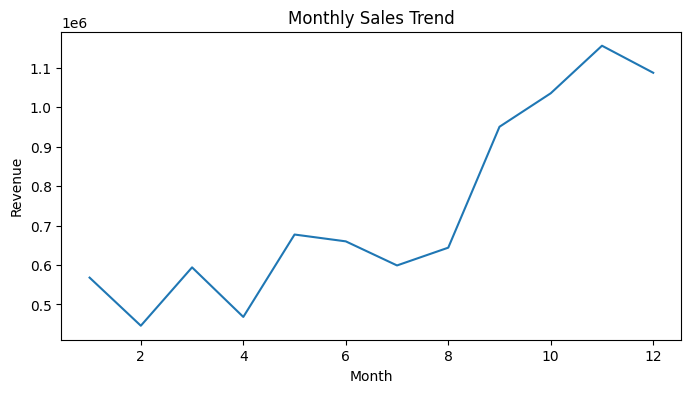

In [9]:
import matplotlib.pyplot as plt

df['Month'] = df['InvoiceDate'].dt.month
monthly_sales = df.groupby('Month')['TotalPrice'].sum()

plt.figure(figsize=(8,4))
monthly_sales.plot(kind='line')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.show()

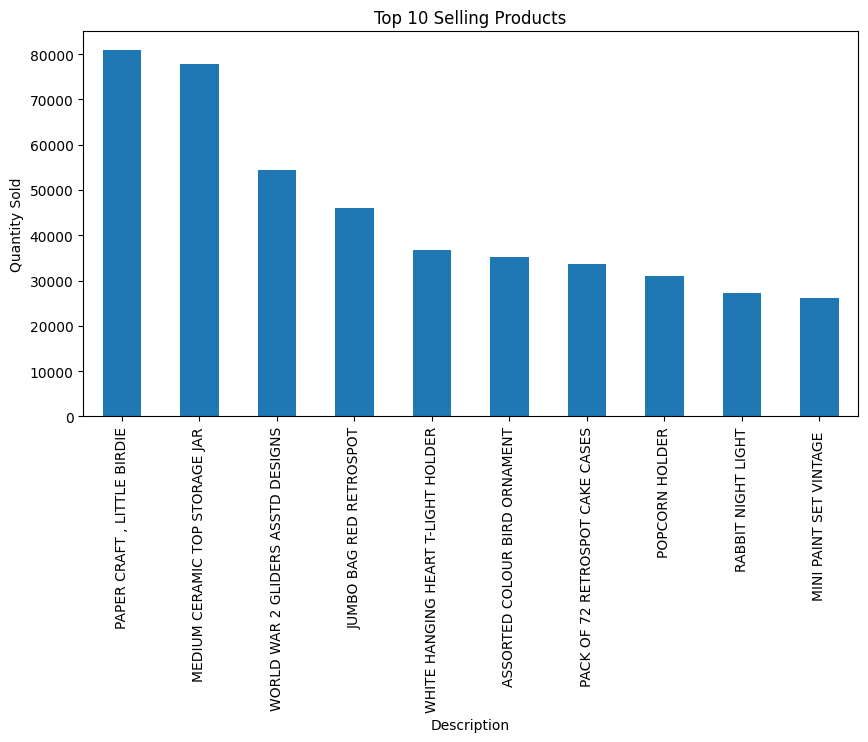

In [10]:
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
top_products.plot(kind='bar')
plt.title("Top 10 Selling Products")
plt.ylabel("Quantity Sold")
plt.xticks(rotation=90)
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Label repeat customers
customer_counts = df.groupby('CustomerID')['InvoiceNo'].nunique()
repeat_purchase = (customer_counts > 1).astype(int)

# Feature: Total spent by customer
customer_spend = df.groupby('CustomerID')['TotalPrice'].sum()

# Create feature dataframe
features = pd.DataFrame({
    'TotalSpent': customer_spend,
    'RepeatPurchase': repeat_purchase
})

# Split data
X = features[['TotalSpent']]
y = features['RepeatPurchase']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

print("Model Accuracy:", accuracy_score(y_test, y_pred))

Model Accuracy: 0.8348694316436251
